In [1]:
import pandas as pd

df = pd.read_csv('data/kbo_한화_관중수.csv')

In [2]:
df

,경기수,날짜,요일,홈,방문,구장,관중수,승패
0,1,03월 29일,금,한화,KT,대전,"12,000",1
1,2,03월 30일,토,한화,KT,대전,"12,000",1
2,3,03월 31일,일,한화,KT,대전,"12,000",1
3,4,04월 02일,화,한화,롯데,대전,"12,000",0
4,5,04월 04일,목,한화,롯데,대전,"12,000",1
...,...,...,...,...,...,...,...,...
64,67,09월 22일,일,한화,롯데,대전,"12,000",1
65,68,09월 23일,월,한화,롯데,대전,"10,407",0
66,69,09월 27일,금,한화,KIA,대전,"12,000",1
67,70,09월 28일,토,한화,SSG,대전,"12,000",0


In [3]:
df = df[['날짜','관중수','승패']]

In [4]:
# '관중수' 컬럼의 쉼표 제거하고, 숫자형으로 변환
df['관중수'] = df['관중수'].replace({',': ''}, regex=True).astype(float)

C:\Users\82102\AppData\Local\Temp\ipykernel_17616\3363018191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['관중수'] = df['관중수'].replace({',': ''}, regex=True).astype(float)


In [5]:
# 1. '날짜' 형식을 '2024-03-29'로 변환 (2024년을 넣어줍니다)
df['날짜'] = df['날짜'].str.replace(r'(\d{2})월 (\d{2})일', r'2024-\1-\2', regex=True)

# 2. 날짜를 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y-%m-%d')

C:\Users\82102\AppData\Local\Temp\ipykernel_17616\3672805262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['날짜'] = df['날짜'].str.replace(r'(\d{2})월 (\d{2})일', r'2024-\1-\2', regex=True)
C:\Users\82102\AppData\Local\Temp\ipykernel_17616\3672805262.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['날짜'] = pd.to_datetime(df['날짜'], format='%Y-%m-%d')


In [6]:
df['날짜'] = df['날짜'].str.replace(r'(\d{2})월 (\d{2})일', r'2024-\1-\2')

AttributeError: Can only use .str accessor with string values!

In [7]:
df

,날짜,관중수,승패
0,2024-03-29,12000.0,1
1,2024-03-30,12000.0,1
2,2024-03-31,12000.0,1
3,2024-04-02,12000.0,0
4,2024-04-04,12000.0,1
...,...,...,...
64,2024-09-22,12000.0,1
65,2024-09-23,10407.0,0
66,2024-09-27,12000.0,1
67,2024-09-28,12000.0,0


In [8]:
correlation_matrix = df.corr()

In [9]:
# 상관계수 출력
print(correlation_matrix)

           날짜       관중수        승패
날짜   1.000000 -0.085026 -0.091064
관중수 -0.085026  1.000000 -0.081445
승패  -0.091064 -0.081445  1.000000


In [11]:
from scipy.stats import spearmanr

# 스피어만 상관 계수 계산
spearman_corr, _ = spearmanr(df['관중수'], df['승패'])
print(f"Spearman's rank correlation coefficient: {spearman_corr}")

Spearman's rank correlation coefficient: -0.17763923748573185


In [12]:
# 피어슨 상관 계수
pearson_corr = df['관중수'].corr(df['승패'])
print(f"Pearson correlation coefficient: {pearson_corr}")

# 스피어만 상관 계수
spearman_corr, _ = spearmanr(df['관중수'], df['승패'])
print(f"Spearman's rank correlation coefficient: {spearman_corr}")

Pearson correlation coefficient: -0.0814450809205877
Spearman's rank correlation coefficient: -0.17763923748573185


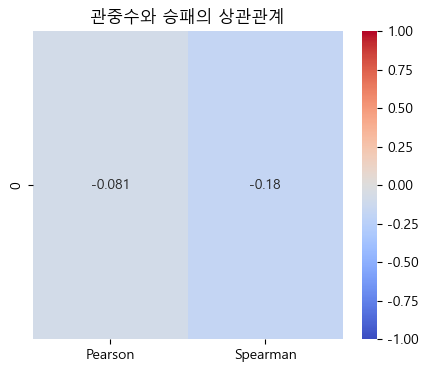

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic' 

plt.rcParams['axes.unicode_minus'] = False

# 피어슨 상관 계수 계산
pearson_corr = df['관중수'].corr(df['승패'])

# 스피어만 상관 계수 계산
spearman_corr, _ = spearmanr(df['관중수'], df['승패'])

# 두 상관 계수를 데이터프레임으로 묶기
corr_df = pd.DataFrame({
    'Pearson': [pearson_corr],
    'Spearman': [spearman_corr]
})

# 히트맵 시각화
plt.figure(figsize=(5, 4))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('관중수와 승패의 상관관계')
plt.show()

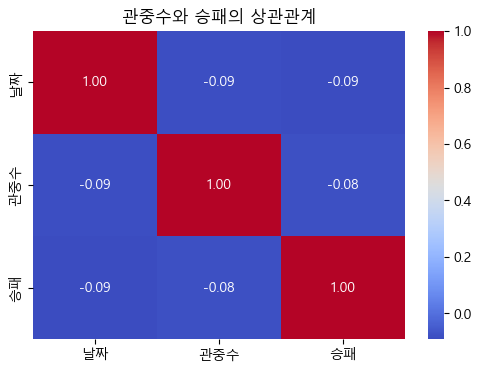

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic' 

# 히트맵으로 상관관계 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# 타이틀 설정
plt.title('관중수와 승패의 상관관계')

# 그래프 출력
plt.show()

In [42]:
df.to_csv('data/관중수.csv')

c:\Users\82102\anaconda3\envs\nof\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82102\anaconda3\envs\nof\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82102\anaconda3\envs\nof\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82102\anaconda3\envs\nof\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82102\anaconda3\envs\nof\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(

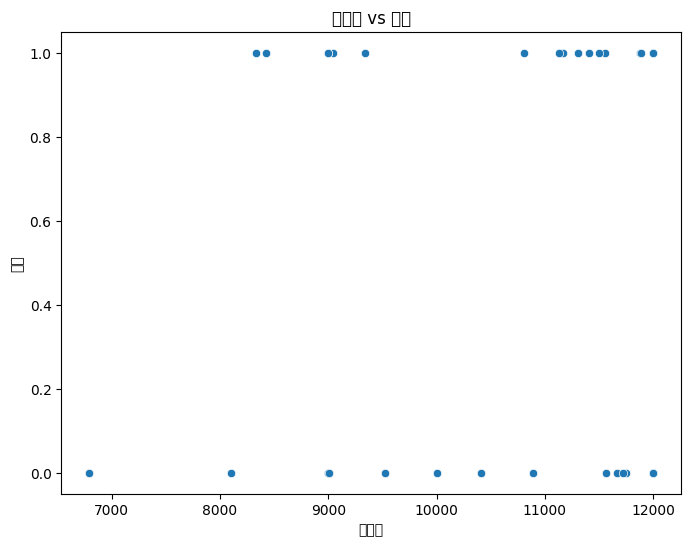

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 시각화
plt.figure(figsize=(8,6))
sns.scatterplot(x='관중수', y='승패', data=df)
plt.title('관중수 vs 승패')
plt.xlabel('관중수')
plt.ylabel('승패')
plt.show()

R^2 Score: -0.022325193915333275
Mean Squared Error: 0.23471751901117338


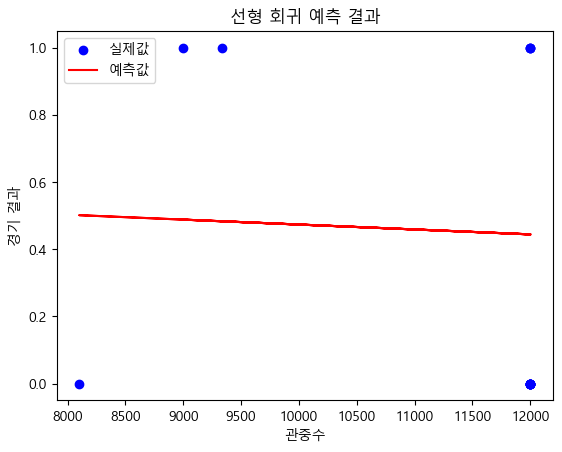

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 예시 (df는 이미 로드된 DataFrame이어야 합니다)
# df = pd.read_csv("your_data.csv")  # 실제 데이터 파일로 교체

# 독립 변수와 종속 변수 정의
X = df[['관중수']]  # 관중수를 독립 변수로 설정
y = df['승패']  # 승패를 종속 변수로 설정

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측값 생성
y_pred = model.predict(X_test)

# 모델 평가 (R^2, MSE)
print("R^2 Score:", r2_score(y_test, y_pred))  # 결정 계수 (모델 설명력)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))  # 평균 제곱 오차

# 예측 결과 시각화
plt.scatter(X_test, y_test, color='blue', label='실제값')  # 실제 데이터 포인트
plt.plot(X_test, y_pred, color='red', label='예측값')  # 예측된 직선
plt.xlabel('관중수')
plt.ylabel('경기 결과')
plt.title('선형 회귀 예측 결과')
plt.legend()
plt.show()